Random forrest regressor with leave one out cross validation schema.

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
init_df = pd.read_csv('../../../data/geo_mode_data/final.csv')
init_df.head()

,continent,gdp_per_capita,hospital_beds_per_thousand,human_development_index,life_expectancy,population,population_density,gradient
0,1,1803.987,0.5,0.498,64.83,38928341.0,54.422,0.0
1,1,1803.987,0.5,0.498,64.83,38928341.0,54.422,0.0
2,1,1803.987,0.5,0.498,64.83,38928341.0,54.422,0.0
3,1,1803.987,0.5,0.498,64.83,38928341.0,54.422,0.0
4,1,1803.987,0.5,0.498,64.83,38928341.0,54.422,0.0


In [3]:
train_y = init_df['gradient']
train_X = init_df.drop(['gradient'],axis=1)

In [4]:
params = [
    {'bootstrap': [False, True],
     'n_estimators': [80,90, 100, 110, 130],
     'max_features': [0.6, 0.65, 0.7, 0.73, 0.7500000000000001, 0.78, 0.8],
     'min_samples_leaf': [10, 12, 14],
     'min_samples_split': [3, 5, 7]
    },
]

In [5]:
rnd_frr_reg = RandomForestRegressor()
rnd_frr_grid = GridSearchCV(rnd_frr_reg,params,
                            scoring = 'neg_mean_squared_error', cv = 10,
                            return_train_score = True)
rnd_frr_grid.fit(train_X,train_y)


GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False, True],
                          'max_features': [0.6, 0.65, 0.7, 0.73,
                                           0.7500000000000001, 0.78, 0.8],
                          'min_samples_leaf': [10, 12, 14],
                          'min_samples_split': [3, 5, 7],
                          'n_estimators': [80, 90, 100, 110, 130]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [6]:
print(rnd_frr_grid.best_score_)
print(rnd_frr_grid.best_params_)
print(rnd_frr_grid.best_index_)
opt_model = rnd_frr_grid.best_estimator_

-4460637.403493727
{'bootstrap': False, 'max_features': 0.7, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 80}
95


In [7]:
df = pd.read_csv('../../../data/geo_mode_data/test.csv')
test_df=df.drop('index',axis=1)
test_df.head()

,continent,gdp_per_capita,hospital_beds_per_thousand,human_development_index,life_expectancy,Population,population_density
0,1,5743.47,5.51,0.710,73.0,2448000,3502
1,1,5725.22,2.35,0.752,73.2,2417000,1743
2,1,5725.22,2.17,0.733,73.2,1284000,804
3,1,3383.03,3.59,0.688,73.1,1130000,684
4,1,3383.03,2.68,0.690,73.9,863000,673


In [8]:
preds = opt_model.predict(test_df)

In [9]:
print(preds)

[198.12473038 201.12157437  45.64399459  32.05140918  31.98992087
  34.9649926   38.39996197  27.15857712 136.02672286  21.57301097
  32.72551268  22.08381059  26.4963428   29.17989234  25.69633182
  29.8931003  131.06461772  17.08414651  23.82799949  24.71494837
  29.3777387   24.22631793  26.02953164  25.98946366  35.76006414]


In [21]:
pred_df = pd.DataFrame(data=preds, index=range(1,preds.shape[0]+1))
pred_df.reset_index(inplace=True)
print(pred_df.columns)
pred_df.rename(columns={'index':'district', 0:'geo_gradient'}, inplace=True)
pred_df.head()

Index(['index', 0], dtype='object')


,district,geo_gradient
0,1,198.124730
1,2,201.121574
2,3,45.643995
3,4,32.051409
4,5,31.989921


<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'gradient variation with district')

Text(0.5, 0, 'district number')

Text(0, 0.5, 'geo gradient value')

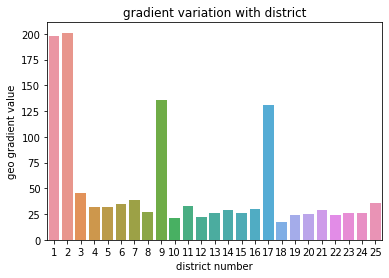

In [26]:
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.figure()
plt.subplot((111))
sns_gradient = sns.barplot(x="district", y="geo_gradient", data=pred_df)
sns_gradient.set_title("gradient variation with district")
sns_gradient.set_xlabel("district number")
sns_gradient.set_ylabel("geo gradient value")

In [48]:
from sklearn.preprocessing import normalize

vals = np.array(pred_df['geo_gradient'])
normalized_grad = normalize([vals])
pred_df['gradient'] = pd.Series(data=normalized_grad[0], index=range(1,normalized_grad.shape[1]+1))

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'gradient variation with district')

Text(0.5, 0, 'district number')

Text(0, 0.5, 'geo gradient value')

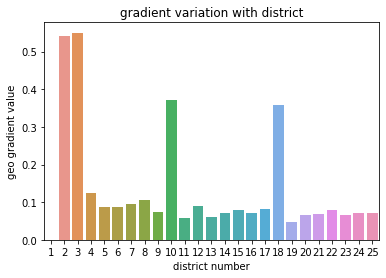

In [49]:
plt.figure()
plt.subplot((111))
sns_gradient = sns.barplot(x="district", y="gradient", data=pred_df)
sns_gradient.set_title("gradient variation with district")
sns_gradient.set_xlabel("district number")
sns_gradient.set_ylabel("geo gradient value")

In [50]:
pred_df.to_csv('../../../data/main_data/Geo_grad.csv', index=False)

In [13]:
df['EDA'] = preds
df.to_csv('../../../data/main_data/EDA.csv',index=False)